# The mathematical building blocks of neural networks
Understanding deep learning requires an understanding of many simple mathematical concepts: tensors, tensor operations, differentiation, gradient descent, and more.

## 2.1 A first look at a neural network
Let's take a look at a neural network that classifies handwritten digits. The problem we're trying to solve is to classify grayscale images of handwritten digits (28 x 28 pixels) into their 10 categories (0 through 9). To do this, we will use the MNIST dataset which consists of 60,000 training images and 10,000 test images.

#### Loading the MNIST dataset in Keras

In [2]:
from keras.datasets import mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11264000/11490434 [============================>.] - ETA: 0s

`train_images` and `train_labels` form the training set, which is the data the model will learn from. The model will then be tested on the test set, which consists of `test_images` and `test_labels`. The images are encoded as Numpy arrays, and the labels are an array of digits, ranging from 0 to 9.

In [4]:
# view train data
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
# view test data
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

The workflow will be as follows: First, we will feed the neural network the training data. The network will then learn to associate images and labels. Then, we will ask the network to produce predictions for `test_images` and will see how well those predictions matched the actual `test_labels`.

Now, let's build the network.
#### The network architecture

In [10]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

The core building block of a neural network is the *layer*, which is effectively a filter for the data. Data goes in and comes out in a more useful representation. Most deep learning consists of chaining together multiple simple layers that will implement a form of progressive *data distillation*.

The network we programmed above consists of two `Dense` layers, which are also called *fully connected*. The last layer is a 10-way *softmax* layer, which means it will return an array of 10 probability scores- each score corresponding to a number 0 to 9.

To make the network ready for training, we need to pick three more things, as part of the *compilation* step:
 - A *loss function* - How the network will be able to measure its performance on the training data, and how it will be able to steer itself in the right direction.
 - An *optimizer* - The mechanism through which the network will update itself based on the data it sees and its loss function.
 - *Metrics to monitor during training and testing* - Here, we will only care about accuracy.
 
#### The compilation step

In [11]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Before training, we will reshape the data into the shape the network expects, and we will scale it so that all the pixel values are in the [0,1] interval.

#### Preparing the image data

In [13]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

We also need to categorically encode the labels.

#### Preparing the labels

In [14]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [16]:
# Train the network
network.fit(train_images, train_labels, epochs=8, batch_size=128)

Epoch 1/8
60000/60000 [==============================] - 7s - loss: 0.3056 - acc: 0.9120     
Epoch 2/8
60000/60000 [==============================] - 7s - loss: 0.2913 - acc: 0.9159     
Epoch 3/8
60000/60000 [==============================] - 9s - loss: 0.2794 - acc: 0.9196     
Epoch 4/8
60000/60000 [==============================] - ETA: 0s - loss: 0.2691 - acc: 0.922 - 7s - loss: 0.2687 - acc: 0.9226     
Epoch 5/8
60000/60000 [==============================] - 7s - loss: 0.2585 - acc: 0.9252     
Epoch 6/8
60000/60000 [==============================] - 7s - loss: 0.2489 - acc: 0.9280     
Epoch 7/8
60000/60000 [==============================] - 7s - loss: 0.2391 - acc: 0.9313     
Epoch 8/8
60000/60000 [==============================] - 7s - loss: 0.2300 - acc: 0.9339     


Two quantities are displayed during the training: the loss of the network over the training data, and the accuracy of the network over the training data.

We were able to reach an accuracy of 93.4%, so now let's see how well the model performs on the test set:

In [17]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print "test_acc: ", test_acc

 9760/10000 [============================>.] - ETA: 0stest_acc:  0.9005


The test accuracy turned out to be just over 90%, which is considerably lower than the training set accuracy. The gap in accuracies is an example of *overfitting*.

## 2.2 Data representations for neural networks
In the example above, we started with data stored in a multidimensional NumPy array, also called *tensors*. A tensor is a container for data- almost always numerical data. Matrices are 2D tensors: tensors are a generalization of matrices to an arbitrary number of dimensions.

### 2.2.1 Scalars (0D tensors)
A tensor that contains only one number is called a *scalar*. A scalar has 0 axes. The number of axes of a tensor is also called its *rank*. Here is a NumPy scalar:

In [18]:
import numpy as np
x = np.array(12)
x

array(12)

In [19]:
x.ndim

0

### 2.2.2 Vectors  (1D tensors)
An array of numbers is called a *vector*, or 1D tensor. A 1D tensor is said to have exactly one axis. Here is a NumPy vector:

In [20]:
x = np.array([12, 3, 6, 14])
x

array([12,  3,  6, 14])

In [21]:
x.ndim

1

This vector has five entries, so it is called a *5-dimensional vector*. A 5D vector has only one axis and has five dimensions along its axis, whereas a 5D tensor has five axes. *Dimensionality* can denote either number of entries along a specific axis or the number of axes in a tensor.

### 2.2.3 Matrices (2D tensors)
An array of vectors is a *matrix*, or 2D tensor. A matrix has two axes (rows and columns). Here is a NumPy matrix:

In [22]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### 2.2.4 3D tensors and higher-dimensional tensors
If you pack such matrices in a new array, you obtain a 3D tensor, which you can visually interpret as a cube of numbers. Here is a NumPy 3D tensor:

In [23]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])

x.ndim

3

By packing 3D tensors in an array, you can create a 4D tensor, and so on. Deep learning generally consists of minipulating 0D to 4D tensors, but you may go up to 5D if you process video data.

### 2.2.5 Key attributes
A tensor is defined by three key attributes:
 - *Number of axes (rank)* - For instance, a 3D tensor has three axes, and a matrix has two axes. This is also called the tensor's `ndim` in Python libraries such as NumPy.
 - *Shape*- This is a tuple of integers that describes how many dimensions the tensor has along each axis. For instance, the previous matrix example has shape (3, 5), and the 3D tensor example has shape (3, 3, 5). A vector has a shape with a single element, such as (5,), and a scalar has an empty shape, ().
 - *Data type*- This is the type of the data contained in the tensor.
 
To make this more concrete, let's look back at the data we processed in the MNIST example.

In [24]:
# First we load the dataset
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [25]:
# Next, display the number of axes of the tensor train_images
print train_images.ndim

3


In [26]:
# Here is the shape
print train_images.shape

(60000, 28, 28)


In [27]:
# and Data type
print train_images.dtype

uint8


So what we have is a 3D tensor of 8-bit integers. Precisely, it's an array of 60,000 matrices of 28 x 8 integers. Each matrix is a grayscale image, with coefficients between 0 and 255.

Let's display the 4th digit:

#### Displaying the fourth digit

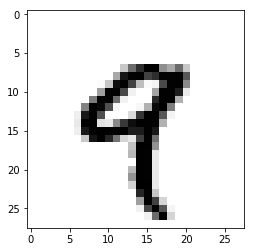

In [28]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### 2.2.6 Manipulating tensors in Numpy
Above, we *selected* a specific digit alongside the first axis. Selecting specific elements in a tensor is called *tensor slicing*. Here is an example of tensor slicing in NumPy:

In [29]:
my_slice = train_images[10:100]
print my_slice.shape

(90, 28, 28)


In [30]:
# Equivalent notation
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [31]:
# Also equivalent notation
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [32]:
# can also use negative indices
# crop image to a patch of 14x14 pixels centered in middle
my_slice = train_images[:, 7:-7, 7:-7]

### 2.2.7 The notion of data batches
In general, the first axis in all data tensors you will come across in deep learning will be the *samples axis*. Deep learning models don't process an entire dataset at once; rather, they break the data into small batches. Here is one batch of the MNIST digits with batch size of 128:

In [33]:
batch = train_images[:128]

In [34]:
# next batch
batch = train_images[128:256]

In [36]:
# nth batch
n = 0
batch = train_images[128 * n:128 * (n + 1)]

When considering a batch tenso, the first axis is called the *batch axis* or *batch dimension*.

### 2.2.8 Real-world examples of data tensors
Let's make data tensors more concrete with a few examples similar to what you'll encounter. The data you will manipulate will almost always fall into one of the following categories:
 - **Vector data** - 2D tensors of shape (`samples, features`)
 - **Timeseries data or sequence data**- 3D tensors of shape (`samples, timesteps, features`)
 - **Images** - 4D tensors of shape (`samples, height, width, channels`) or (`samples, channels, height width`)
 - **Video** - 5D tensors of shape (`samples, frames, height, width, channels`) or (`samples, frames, channels, height, width`)
 
### 2.2.9 Vector data
In the most common case, each point in a dataset can be encoded as a vector, and a batch of data will be encoded as a 2D tensor, where the first axis is the *samples axis* and the second axis is the *features axis*.
Here are a few examples:
 - An actuarial dataset of people, where we consider each person's age, ZIP, and income. Each person can be characterized as a vector of 3 values. An entire dataset of 100,000 people can be stored in a 2D tensor of shape (100000, 3).
 - A dataset of text documents, where we represent each document by the counts of how many times each word appears in it (out of a dictionary of 20,000 common words). Each document can be encoded as a vector of 20,000 values (one counter per word in the dictionary). An entire dataset of 500 documents can be stored in a tensor of shape (500, 20000).
 
### 2.2.10 Timeseries data or sequence data
When time matters in your data (or the notion of sequence order), it makes sense to store it in a 3D tensor with an explicit time axis. Each sample can be encoded as a sequence of vectors (2D tensor). A batch of data will be encoded as a 3D tensor.

![timeseries](images/2_2_10_timeseries.jpg)

Time is always the second axis (index 1), by convention. Here are a few examples:
 - A dataset of stock prices. Every minute, we store the current price of the stock, the highest price in the past minute, and the lowest price in the past minute. Every minute is encoded as a 3D vector, an entire day of trading is encoded as a 2D tensor of shape (390, 3) (390 minutes in a trading day), and 250 days' worth of data can be stored in a 3D tensor of shape (250, 390, 3).
 - A dataset of tweets, where we encode each tweet as a sequence of 280 characters out of an alphabet of 128 unique characters. Each character can be encoded as a binary vector of size 128 (all zeros except for a 1 for the character). Then each tweet can be encoded as a 2D tensor of shape (280, 128), and a dataset of 1 million tweets can be stored in a tensor of shape (1000000, 280, 128).
 
### 2.2.11 Image data
Images usually have three dimensions: height, width, and color depth. Grayscale images only have a single color channel and could be stored in 2D tensor, but, by convention, most image tensors are always 3D, with a 1D color channel for grayscale images. A batch of 128 grayscale images of size 256 x 256 could be stored in a tensor of shape (128, 256, 256, 1), and a batch of 128 color images could be stored in a tensor of shape (128, 256, 256, 3).

![imagetensor](images/2_2_11_imagetensor.jpg)

There are two common conventions for shapes of image tensors: the *channels-last* convention (used by TensorFlow) and the *channels-first* convention (Theano). TensorFlow places color-depth axis at the end (`samples, height, width, color_depth`), while Theano places it after the batch axis (`samples, color_depth, height, width`). Keras supports both formulas.

### 2.2.12 Video data
Video data requires 5D tensors. A video can be understood as a sequence of frames, each frame being a color image. Because each frame is stored in a 3D tensor (height, width, color_depth), a sequence of frames can be stored in a 4D tensor (frames, height, width, color_depth), and a batch of different videos can be stored in a 5D tensor of shape (samples, frames, height, width, color_depth).
 - An example would be a 60-second, 144 x 256 video clip sampled at 4 frames per second would have 240 frames (60 x 4 = 240). A batch of four video clips would be stored in a tensor of shape (4, 240, 144, 256, 3). That's 106,168,320 values! If the datatype of the tensor was `float32`, then each value would be stored in 32 bits, so the tensor would be 405 MB. Luckily, most videos are compressed significantly (say, MPEG format).
 
## 2.3 The gears of neural networks: tensor operations
All transformations learned by deep neural networks can be reduced to a handful of *tensor operations* applied to tensors of numeric data.

The example above built a network by stacking `Dense` layers on top of each other. A Keras layer looks like this:

In [ ]:
keras.layers.Dense(512, activation='relu')

This layer is essentially a function that takes a 2D tensor as its input and returns another 2D tensor which is a new representation of the input tensor. Specifically, the finction is as follows:

In [ ]:
# W is a 2D tensor and b is a vector
output = relu(dot(W, input) + b)

In the function above, we have three tensor operations: a dot product between the input tensor and a tensor named W; an addition between the resulting 2D tensor and a vector b; and a `relu` operation which is `max(x, 0)`.

### 2.3.1 Element-wise operations
The `relu` operation and the addition are *element-wise* operations that are applied independently to each entry in the tensors being considered. This means the operations are good for massive parallel implementations. If you want to write a naive Python implementation of an element-wise operation, you would use a `for` loop, as in this naive implementation of an element-wise `relu` operation:

In [38]:
def naive_relu(x):
    assert len(x.shape) == 2  # x is a 2D Numpy tensor
    
    x = x.copy() # Avoid overwriting the input tensor
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [40]:
tensor2D = np.array([[5, 78, -1, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
naive_relu(tensor2D)

array([[ 5, 78,  0, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [41]:
# same for loop for addition
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

Similarly, you can do element-wise multiplication, subtraction, division, etc.

### 2.3.2 Broadcasting
The `naive_add` function above only supports the addition of 2D tensors with identical shapes. But in the `Dense` layer introduced earlier, we added a 2D tensor with a vector. What happens with addition when the shapes of the two tensors being added differ? When possible, the smaller tensor with be *broadcasted* to match the shape of the larger tensor.

Consider X with a shape of (32, 10) and y with a shape of (10,). First, we add an empty first axis to y, whose shape becomes (1,10). Then we repeat y 32 times alongside this new axis, so that we end up with a tensor Y with shape (32,10), where Y[i,:] == y for i in range(0,32). At this point, we can proceed to add X and Y because they have the same shape.

Here is a naive implementation:

In [42]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2 # 2D tensor
    assert len(y.shape) == 1 # Numpy vector
    assert x.shape[1] == y.shape[0]
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

The following example applies the element-wise maximum operation to two tensors of different shapes via broadcasting:

In [44]:
import numpy as np

x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))

z = np.maximum(x, y)

### 2.3.3 Tensor dot
The dot operation (aka *tensor product*) is the most common, most useful tensor operation. An element-wise product is done with the * operator in Numpy, Keras, Theano, and TensorFlow. Here is how it is done in Numpy and Keras (different in TensorFlow):

In [ ]:
z = np.dot(x, y)

In [46]:
# Naive implementation of dot product of two vectors: x and y
def naive_vector_dot(x, y):
    assert len(x.shape) == 1 # x and y are numpy vectors
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [47]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

naive_vector_dot(x, y)

32.0

The above function returns a scalar, which is the dot product between two vectors. You can also take the dot product between a matrix x and a vector y, which returns a vector where the coefficients are the dot products between y and the rows of x. Here is an implementation:

In [48]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2 # x is numpy matrix
    assert len(y.shape) == 1 # y is numpy vector
    assert x.shape[1] == y.shape[0] # 1st dimension of x is same as 0th of y
    
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [51]:
x = np.array([[1, 2, 3],
              [4, 5, 6]])

y = np.array([7, 8, 9])

naive_matrix_vector_dot(x, y)

array([  50.,  122.])

In [50]:
# could also write function like this
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

As soon as one of the two tensors has an `ndim` greater than 1, `dot` is not longer symmetric, which means `dot(x,y)` is not the same as `dot(y,x)`.

The most common applications may be the dot product between two matrices. You can take the dot product of two matrices x and y (dot(x,y)) if and only if x.shape[1] == y.shape[0]. The result is a matrix with shape (x.shape[0], y.shape[1]), where the coefficients are the vector products between the rows of x and columns of y. Here is the naive implementation:

In [52]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2 # x is numpy matrix
    assert len(y.shape) == 2 # y is numpy matrix
    assert x.shape[1] == y.shape[0] # 1st dimension of x is same as 0th of y
    
    z = np.zeros((x.shape[0], y.shape[1])) # returns a matrix of 0s in shape given
    for i in range(x.shape[0]): # iterates over rows of x
        for j in range(y.shape[1]): # and columns of y
            row_x = x[i, :] 
            column_y = y[:, j] 
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

In [54]:
x = np.array([[1, 2],
              [4, 5]])
y = np.array([[2, 4, 6],
              [8, 10, 12]])

naive_matrix_dot(x, y)

array([[ 18.,  24.,  30.],
       [ 48.,  66.,  84.]])

Here is an image to better visualize the dot-product shape compatibility:

![matrixdot](images/2_3_3_matrixdot.jpg)

The rows of x and the columns of y must have the same shape.

### 2.3.4 Tensor reshaping
A third type of tensor operation that's essential to understand is *tensor reshaping*. This was used when we preprocessed the digits data before feeding it into our network:

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

Reshaping a tensor means rearranging its rows and columns to match a target shape. The reshaped tensor has the same total number of coefficients as the initial tensor. Here is an example:

In [55]:
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])

print x.shape

(3, 2)


In [56]:
x = x.reshape((6, 1))
x

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.]])

In [57]:
x = x.reshape((2, 3))
x

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.]])

A special case of reshaping that's commonly encountered is *transposition*. *Transposing* a matrix means exchanging its rows and columns, so that x[i, :] becomes x[:, i].

In [58]:
x = np.zeros((300, 20))
x = np.transpose(x)
print x.shape

(20, 300)


### 2.3.5 Geometric interpretation of tensor operations
The contents of manipulated tensors can be interpreted as coordinates of points in a geometric space. Let's consider addition. Start with the following vector: `A = [0.5, 1]`

This is essentially a point in 2D space. It is common to picture a vector as an arrow linking the origin to the point (see below).

![point](images/2_3_5_point.jpg)

Now consider a new point, `B = [1, 0.25]` which we will add to the previous point. To add the two points, we must chain their vector arrows together, and the resulting location is a vector that represents the sum of the previous vectors.

![point2](images/2_3_5_point2.jpg)

### 2.3.6 A geometric interpretation of deep learning
Neural networks consist entirely of chains of tensor operations and all of these tensor operations are just geometric transformations of the input data. A neural network is a very complex geometric transformation in a high-dimensional space, implemented in a long series of simple steps.

A mental image might be useful here. Imagine two sheets of colored paper: one red and one blue. Put one piece on top of the other, and then crumple them together into a small ball. The crumpled paper ball in the input data, and each sheet of paper is a class of data in a classification problem. A neural network is used to figure out a transformation of the paper ball that uncrumples it, as to make the two classes cleanly separable.


## 2.4 The engine of neural networks: gradient-based optimization
In the implementation of the network above, each neural layer transforms its input data as the following:

In [ ]:
output = relu(dot(W, input) + b)

W and b are tensors that are attributes of the layer that are called *weights* or *trainable parameters* of the layer. These weights contain the information learned by the network from exposure to training data.

To start, these weight matrices are filled with small random values, which, as one could guess, do not yield useful results from the start. What comes next is gradually adjusting these weights based on a feedback signal. This gradual adjustment, or *training*, is the learning that machine learning is all about. It all happens within what's called a *training loop*, which works as follows:
 1. Draw a batch of training samples x and corresponding targets y.
 2. Run the network on x to obtain predictions y_pred.
 3. Compute the loss of the network on the batch, a measure of the mismatch between y_pred and y.
 4. Update all weights of the network in a way that slightly reduces the loss on this batch.
 
Eventually, you will end up with a network that has a very low loss on its training data, meaning a low mismatch rate between y_pred and the expected targets y. The difficult step in the process above is step 4: updating the network's weights. An efficient way to do this is to take advantage of the fact that all operations used in the network are *differentiable*, and compute the *gradient* of the loss with regard to the network's coefficients. You then move the coefficients in the opposite direction from the gradient, which decreases the loss.

### 2.4.1 What's a derivative?
Consider a continuous, smooth function $f(x) = y$, that maps a real number x to a new real number y. Because the function is continuous, a small change in x only results in a small change in y. Say you increase x by a small factor `epsilon_x`, which results in a small `epsilon_y` change to y:

$f(x + epsilon_x) = y + epsilon_y$

Because the function is also smooth (no sharp angles), when `epsilon_x` is small enough, at around a certain point `p`, it's possible to approximate `f` as a linear function of slope `a`, so that `epsilon_y` becomes `a * epsilon_x`:

$f(x + epsilon_x) = y + a * epsilon_x$

This linear approximation is only valid when x is close enough to p.

The slope `a` is the derivative of `f` in `p`. If `a` is negative, it means a small change of `x` around `p` will result in a decrease in `f(x)`. Additionally, the absolute value of `a` tells you how quickly this increase or decrease will happen.

![deriv](images/2_4_1_derivative.jpg)

For every differentiable function `f(x)`, there exists a derivative function `f'(x)` that maps values of x to the slope of the local linear approximation of `f` in those points. 

If you are trying to update `x` by a factor of `epsilon_x` in order to minimize `f(x)`, you just need to move `x` a little in the opposite direction from the derivative.

### 2.4.2 Derivative of a tensor operation: the gradient
A *gradient* is the derivative of a tensor. Consider an input vector `x`, a matrix `W`, a target `y`, and a loss function `loss`. You can use `W` to compute a target candidate `y_pred`, and compute the loss between the target candidate `y_pred` and the target `y`:

In [ ]:
y_pred = dot(W, x)
loss_value = loss(y_pred, y)

If the data inputs x and y are frozen, then this can be interpreted as a function mapping values of `W` to loss values:

In [ ]:
loss_value = f(W)

The derivative of a function `f(x)` of a single coefficient can be interpreted as the slope of the curve of `f`. You can reduce the value of `f(x)` by moving `x` a little in the opposite direction from the derivative.

### 2.4.3 Stochastic gradient descent
Given a differentiable function, it's theoretically possible to find its minimum analytically: it's known that a function's minimum is a point where the derivative is 0, so all you have to do is find all the points where the derivative goes to 0 and check for which of these points the function has the lowest value.

Applied to a neural network, that means finding analytically the combination of weight values that yields the smallest possible loss function. This can be done by solving the equation `gradient(f)(W) = 0` for `W`. To do this, you can use a four-step algorithm to modify the parameters little by little based on the current loss value on a random batch of data. Because you are dealing with a differentiable function, you can compute its gradient, giving you an efficient way to implement step 4. By updating the weights in the opposite direction from the gradient, the loss will be a little less every time:
 1. Draw a batch of training samples `x` and corresponding targets `y`.
 2. Run the network on `x` to obtain predictions `y_pred`.
 3. Compute the loss of the network on the batch, a measure of the mismatch between `y_pred` and `y`.
 4. Compute the gradient of the loss with regard to the network's parameters (*backward pass*)
 5. Move the parameters a little in the opposite direction from the gradient, thus reducing the loss on the batch a bit.
 
The process above is known as *mini-batch stochastic gradient descent*. *Stochastic* refers to the randomness of each batch of data. Here is an image that further gives a visual to this process:

![scd](images/2_4_3_scd.jpg)

It's important to pick a reasonable value for the `step` factor. If it's too small, the descent down the curve will take make iterations, and it could get stuck in a local minimum. If it's too large, your updates may end up taking you to completely random locations on the curve.

There exist several variations of SGD that differ by taking into account previous weight updates when computing the next weight update, rather than just looking at the gradients. One version is SGD with momentum which helps with convergence speed and avoiding local minima. A parameter being optimized via SGD with a small learning rate runs the risk of getting stuck in a local minimum instead of making its way to the global minimum. Momentum is implemented by updating the parameter *w* based not only on the current gradient value but also on the previous parameter update. Here is a naive implementation:

In [ ]:
past_velocity = 0.
momentum = 0.1
while loss > 0.01:
    w, loss, gradient = get_current_parameters()
    velocity = past_velocity * momentum + learning_rate * gradient
    w = w + momentum * velocity - learning_rate * gradient
    past_velocity = velocity
    update_parameter(w)

### 2.4.4 Chaining derivatives: the Backpropagation algorithm
In practice, a neural network function consists of many tensor operations chained together, each of which has a simple, known derivative. For example, this is a network *f* made up of three tensor operations, *a, b*, and *c*, with weight matrices *W1, W2*, and *W3*:

$f(W1, W2, W3) = a(W1, b(W2, c(W3)))$

Such a chain of functions can be derived using the chain rule: $f(g(x)) = f'(g(x)) * g'(x)$. Applying the chain rule to the computation of gradient values of a neural network leads us to the algorithm called *Backpropagation*. Backpropagation starts with the final loss value and works backward from the top layers to the bottom layers, applying the chain rule to compute the contribution that each parameter (